# Load libraries

In [1]:
import modeling
import evaluation
from utils import data_loading
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
train_data = data_loading.load_train(['zaloai', 'mailong25', 'facebook'])
test_data = data_loading.load_test(['zaloai', 'mailong25', 'facebook'])
train_data

,question,text,label
0,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2013 , Nguyễn Quang Hải giành chức vô địch...",True
1,Quang Hải giành được chức vô địch U21 quốc gia...,"Sau chức vô địch U-21 quốc gia 2013 , Nguyễn Q...",True
2,Quang Hải giành được chức vô địch U21 quốc gia...,Anh bắt đầu gia nhập lò đào tạo trẻ Hà Nội T&T...,False
3,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2011 , Nguyễn Quang Hải mới 14 tuổi được g...",False
4,Mỗi hiệp bóng đá kéo dài bao lâu,Một trận đấu bóng đá thông thường có hai hiệp ...,True
...,...,...,...
5490,Ai đã xác định Vaginailis?,Có khoảng 58 triệu ca nhiễm bệnh này trong năm...,True
5491,Bộ phận nào trong quá khứ có quyền ra quyết đị...,Hiến pháp Hoa Kỳ phân chia quyền lực giữa hai ...,True
5492,Lễ trao giải diễn ra khi nào?,"Lễ trao giải Oscar lần thứ 89, tổ chức bởi Việ...",True
5493,Các mẫu được nhắm đến ai?,Dòng Nokia 3000 chủ yếu là điện thoại tầm tru...,True


In [3]:
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_test = test_data.drop(columns=['label'])
y_test = test_data['label']

In [4]:
y_pred = {}

# Train models

## Logistic Regression

In [8]:
model = modeling.get_model('logit-embedding')()
model.fit(X_train, y_train)
y_pred['Logit'] = model.predict(X_test)

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 64)       1920000     input_5[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 500, 64)      1920000     input_6[0][0]                    
_______________________________________________________________________________________

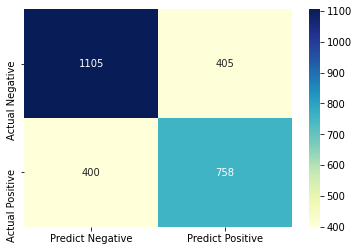

In [9]:
evaluation.plot_confusion_matrix(y_test, y_pred['Logit'])

In [10]:
evaluation.get_f1_score(y_test, y_pred['Logit'])

0.693084198424794

## CRNN

In [7]:
model = modeling.get_model('crnn')()
model.fit(X_train, y_train)
y_pred['CRNN'] = model.predict(X_test)

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, 50)]   0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, None, 400)    100400      input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, None, 50)]   0                                            
__________________________________________________________________________________________________
max_pooling1d_3 (MaxPooling1D)  (None, None, 400)    0           conv1d_3[0][0]                   
_______________________________________________________________________________________

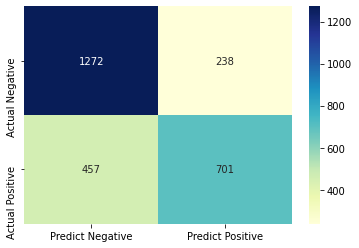

In [8]:
evaluation.plot_confusion_matrix(y_test, y_pred['CRNN'])

In [9]:
evaluation.get_f1_score(y_test, y_pred['CRNN'])

0.7270008773320742

## CRNN + Attention

In [5]:
model = modeling.get_model('crnn-attention')()
model.fit(X_train, y_train)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, 50)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, None, 128)    32128       input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, None, 128)    0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 128)    82048       max_pooling1d[0][0]              
_______________________________________________________________________________________

In [6]:
y_pred['CRNN+Attention'] = model.predict(X_test)

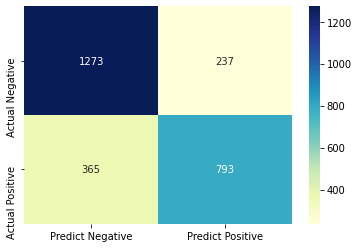

In [10]:
evaluation.plot_confusion_matrix(y_test, y_pred['CRNN+Attention'])

In [11]:
evaluation.get_f1_score(y_test, y_pred['CRNN+Attention'])

0.7668151799465259

# Evaluation

In [13]:
# pickle.dump(y_pred, open('submissions/survey_neural_net.pkl', 'wb'))

In [14]:
with open('submissions/survey_neural_net.pkl', 'rb') as f:
    y_pred = pickle.load(f)

In [12]:
y_pred

{'CRNN+Attention': array([[False],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]]),
 'CRNN': array([[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]]),
 'Logit': array([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])}

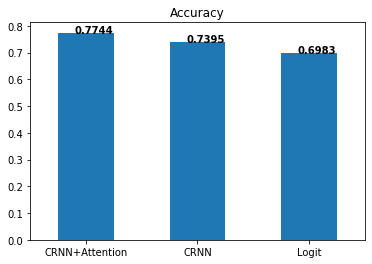

In [126]:
evaluation.plot_accuracy(y_test, y_pred, show_values=True)

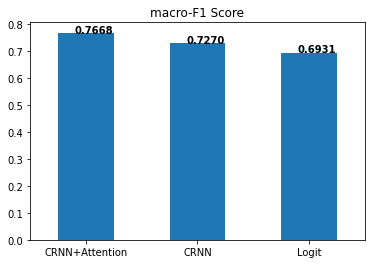

In [127]:
evaluation.plot_f1_score(y_test, y_pred, show_values=True)

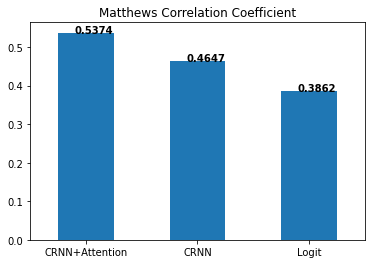

In [128]:
evaluation.plot_mcc(y_test, y_pred, show_values=True)